In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [16]:
colors = sns.color_palette()

In [78]:
df = pd.read_csv('xray.csv')
print(df.shape)
df.head()

(61763, 7)


,patient_id,image,pneumonia,follow_up,patient_age,patient_gender,view_position
0,2,00000002_000.png,False,0,81,M,PA
1,5,00000005_000.png,False,0,69,F,PA
2,5,00000005_001.png,False,1,69,F,AP
3,5,00000005_002.png,False,2,69,F,AP
4,5,00000005_003.png,False,3,69,F,PA


Since each patient can have multiple image, we only get the first sample of each patient to perform analysis

In [79]:
nrof_follow_up = df.groupby('patient_id').follow_up.size().values
df = df.groupby('patient_id').first().reset_index()
df.loc[:, 'follow_up'] = nrof_follow_up
print(df.shape)
df.head()

(25042, 7)


,patient_id,image,pneumonia,follow_up,patient_age,patient_gender,view_position
0,2,00000002_000.png,False,1,81,M,PA
1,5,00000005_000.png,False,6,69,F,PA
2,6,00000006_000.png,False,1,81,M,PA
3,7,00000007_000.png,False,1,82,M,PA
4,8,00000008_001.png,False,1,70,F,PA


### Gender distribution

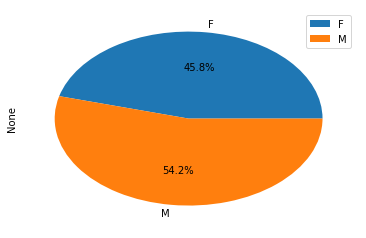

In [30]:
ax = df.groupby('patient_gender').size().plot(kind='pie', autopct='%1.1f%%')
ax.legend()

### How many person get pneumonia

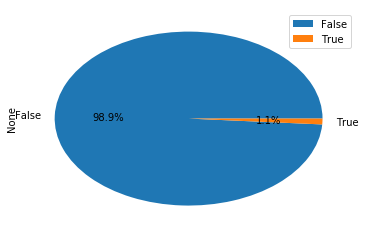

In [31]:
ax = df.groupby('pneumonia').size().plot(kind='pie', autopct='%1.1f%%')
ax.legend()

Just a small potion of sample get pneumonia, it seem that pneumonia is not a common disease

### Does the patient has something related to gender

### Age distribution

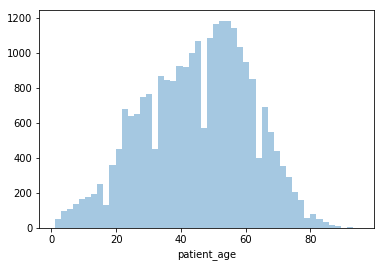

In [100]:
sns.distplot(df.patient_age, kde=False, norm_hist=False)

#### Age distribution by sex

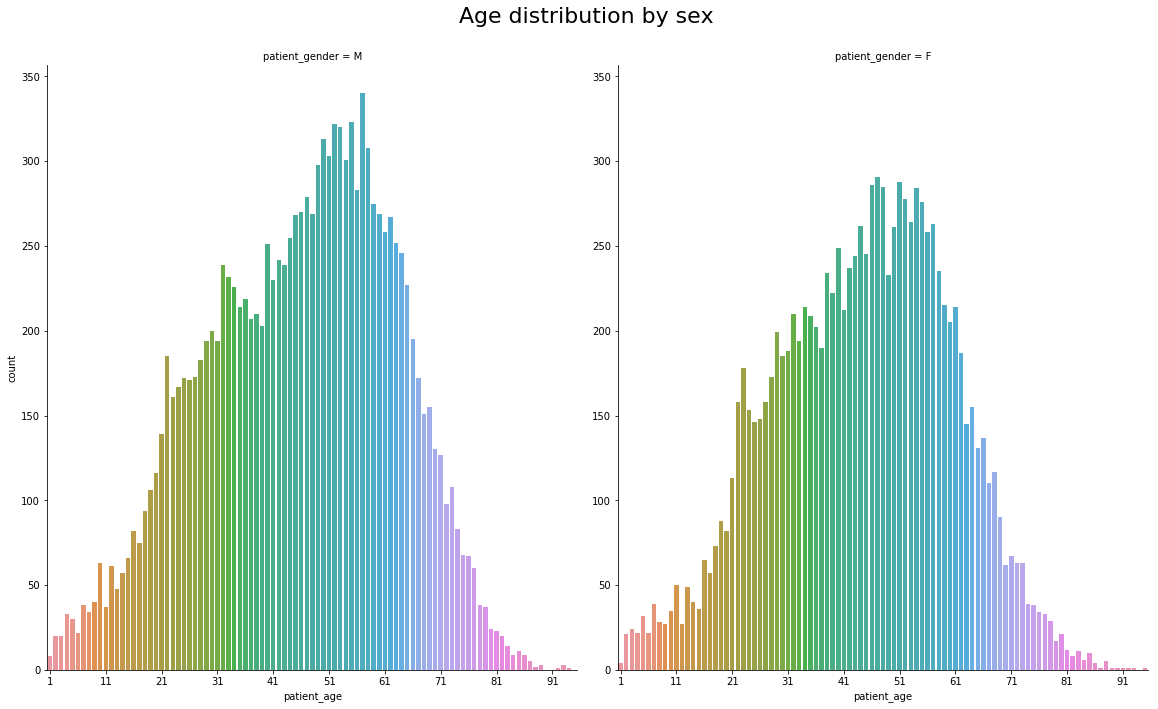

In [43]:
ax = sns.factorplot(x='patient_age', col='patient_gender', data=df, kind='count', size=10, aspect=0.8)
ax.set_xticklabels(step=10)
ax.fig.suptitle('Age distribution by sex', fontsize=22)
ax.fig.subplots_adjust(top=0.9)

#### Age sex distribution by pneumonia

### Follow up distribution

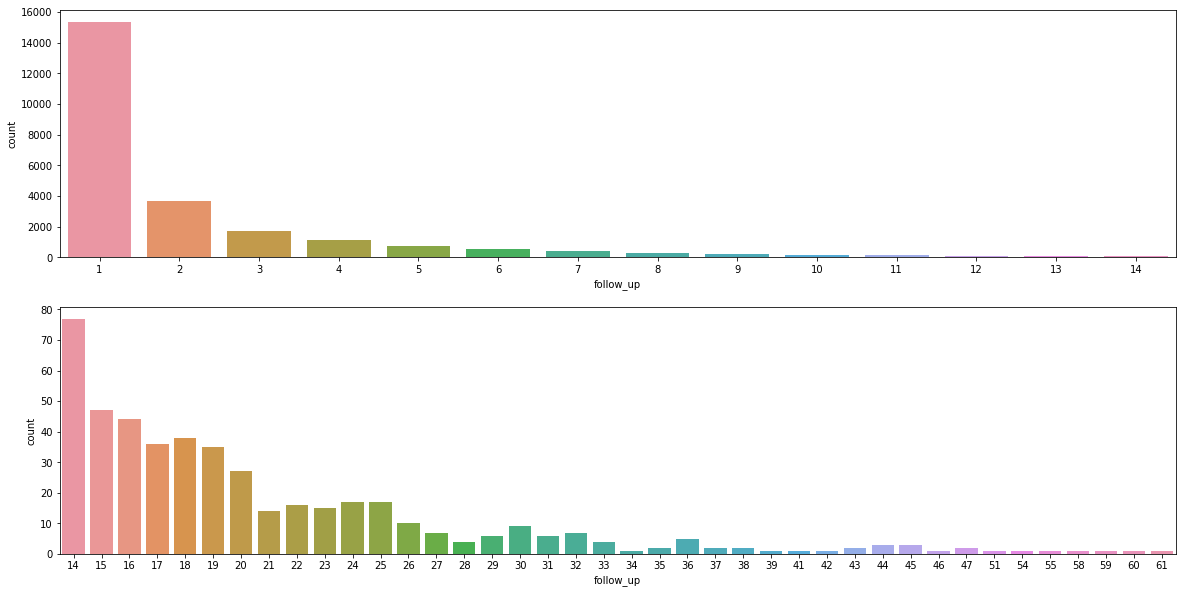

In [96]:
f = plt.figure(figsize=(20, 10))
ax1 = f.add_subplot(211)
data = df[df.follow_up < 15]
sns.countplot(x='follow_up', data=data, ax=ax1)
ax2 = f.add_subplot(212)
data = df[df.follow_up >= 14]
sns.countplot(x='follow_up', data=data, ax=ax2)

### Correlation

In [108]:
copy = df.copy()
copy['gender'] = df.patient_gender.apply(lambda x: x == 'M')
copy = copy[['pneumonia', 'follow_up', 'patient_age', 'gender']]
copy.corr()

,pneumonia,follow_up,patient_age,gender
pneumonia,1.000000,0.020336,0.005399,0.006475
follow_up,0.020336,1.000000,0.023052,0.029880
patient_age,0.005399,0.023052,1.000000,0.046838
gender,0.006475,0.029880,0.046838,1.000000
